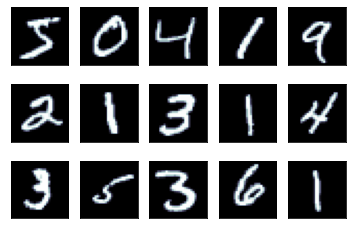

In [102]:
#项目10-项目实施代码
#第一步：数据准备
import numpy as np
import struct
import matplotlib.pyplot as plt
#定义加载训练数据集的函数
def load_mnist_train():
    labels_path='../item10/mnistdata-y/train-labels.idx1-ubyte'
    image_path='../item10/mnistdata-y/train-images.idx3-ubyte'
    with open(labels_path,'rb')as lbpath:
        magic,n=struct.unpack('>II',lbpath.read(8)) 
        labels=np.fromfile(lbpath,dtype=np.uint8)
    with open(image_path,'rb')as imgpath:
        magic,num,rows,cols=struct.unpack('>IIII',imgpath.read(16))
        images=np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
    return images,labels
#定义加载测试数据集的函数
def load_mnist_test():
    labels_path='../item10/mnistdata-y/t10k-labels.idx1-ubyte'
    image_path='../item10/mnistdata-y/t10k-images.idx3-ubyte'
    with open(labels_path,'rb')as lbpath:
        magic,n=struct.unpack('>II',lbpath.read(8))
        labels=np.fromfile(lbpath,dtype=np.uint8)
    with open(image_path,'rb')as imgpath:
        magic,num,rows,cols=struct.unpack('>IIII',imgpath.read(16))
        images=np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
    return images,labels


#加载数据集
train_images,train_labels=load_mnist_train()
test_images,test_labels=load_mnist_test()

#显示图片
fig,ax=plt.subplots(3,5) 
for i,axi in enumerate(ax.flat):
    axi.imshow(train_images[i].reshape(28,28),cmap='bone')
    axi.set(xticks=[],yticks=[]) 
plt.show()


In [95]:
#第二步：数据预处理
from sklearn.preprocessing import StandardScaler #导入数据预处理类

#训练集数据标准化处理
x=StandardScaler().fit_transform(train_images)
x_train=x[0:60000]
y_train=train_labels[0:60000]
#测试集数据标准化处理
x=StandardScaler().fit_transform(test_images)
x_test=x[0:10000]
y_test=test_labels[0:10000]

In [96]:
#第三步：训练与评估模型
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

model=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',solver='sgd',learning_rate_init=0.001,max_iter=500,random_state=1)
model.fit(x_train,y_train)

#模型评估
pred=model.predict(x_test)
re=classification_report(y_test,pred)
print('模型评估报告：')
print(re)

模型评估报告：
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.92      0.91      0.92      1032
           3       0.93      0.93      0.93      1010
           4       0.93      0.94      0.94       982
           5       0.91      0.92      0.91       892
           6       0.95      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.91      0.89      0.90       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



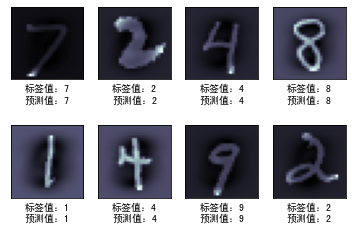

In [101]:
#第四步：显示分类结果
fig,ax=plt.subplots(2,4) #创建一个2行4列的画布
for i,axi in enumerate(ax.flat):
    t=np.random.randint(1,10000)#生成随机整数t作为测试集的下标，可随机选取测试集中的图片
    axi.imshow(x_test[t].reshape(28,28),cmap='bone')#绘制图像
    axi.set(xticks=[],yticks=[])       
    axi.set_xlabel("标签值："+str(y_test[t])+"\n预测值："+str(pred[t])) #显示预测值与标签（真实）值
plt.rcParams['font.sans-serif']='Simhei'
plt.show()